In [200]:
#Импортируем необходимые билиотеки
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import Lasso
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [201]:
#Импортируем наши данные
df = pd.read_csv('forestfires.csv')

#Смотрим имеющиеся столбцы и их тип
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [202]:
#Сделаем статистический анализ
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [203]:
#Проверим выборку на пропуск значений
df.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

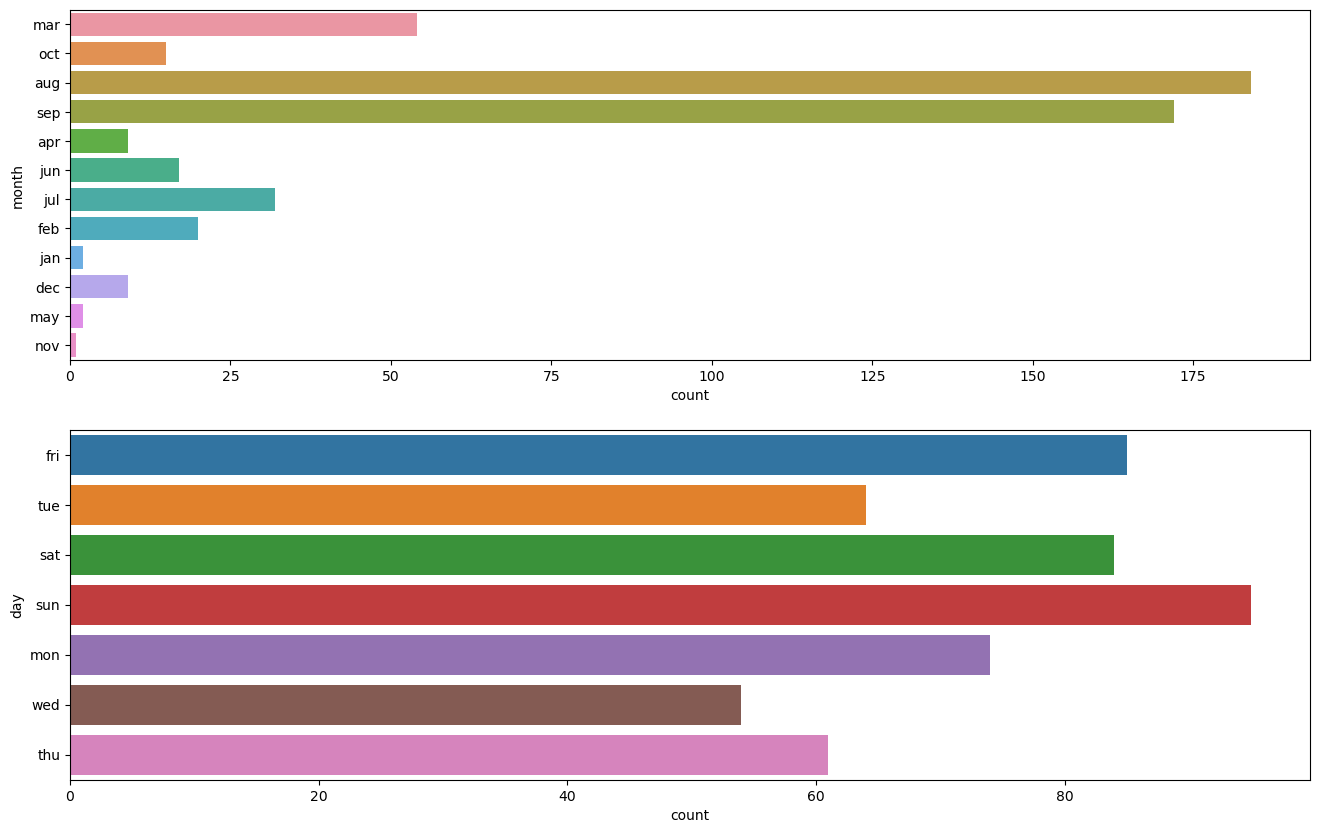

In [204]:
#Разабьем столбцы по типу данных
oject_columns =df.select_dtypes(include='object').columns.tolist()
num_columns = df.select_dtypes(exclude='object').columns.tolist()

#Построим графики по количеству пожаров по месяцам и дням неделям
plt.figure(figsize=(16,10))
for i,col in enumerate(oject_columns,1):
   plt.subplot(2,1,i)
   sns.countplot(data=df,x=col)
plt.show() 

In [205]:
#Заменим строковые данные на числовые (месяца и день недели)
df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace =True)

#Посчитаем корреляцию Пирсона
correlation = df.corr(method='pearson')
print(correlation)

              X         Y     month       day      FFMC       DMC        DC  \
X      1.000000  0.539548 -0.065003 -0.024922 -0.021039 -0.048384 -0.085916   
Y      0.539548  1.000000 -0.066292 -0.005453 -0.046308  0.007782 -0.101178   
month -0.065003 -0.066292  1.000000 -0.050837  0.291477  0.466645  0.868698   
day   -0.024922 -0.005453 -0.050837  1.000000 -0.041068  0.062870  0.000105   
FFMC  -0.021039 -0.046308  0.291477 -0.041068  1.000000  0.382619  0.330512   
DMC   -0.048384  0.007782  0.466645  0.062870  0.382619  1.000000  0.682192   
DC    -0.085916 -0.101178  0.868698  0.000105  0.330512  0.682192  1.000000   
ISI    0.006210 -0.024488  0.186597  0.032909  0.531805  0.305128  0.229154   
temp  -0.051258 -0.024103  0.368842  0.052190  0.431532  0.469594  0.496208   
RH     0.085223  0.062221 -0.095280  0.092151 -0.300995  0.073795 -0.039192   
wind   0.018798 -0.020341 -0.086368  0.032478 -0.028485 -0.105342 -0.203466   
rain   0.065387  0.033234  0.013438 -0.048340  0.056

<Axes: >

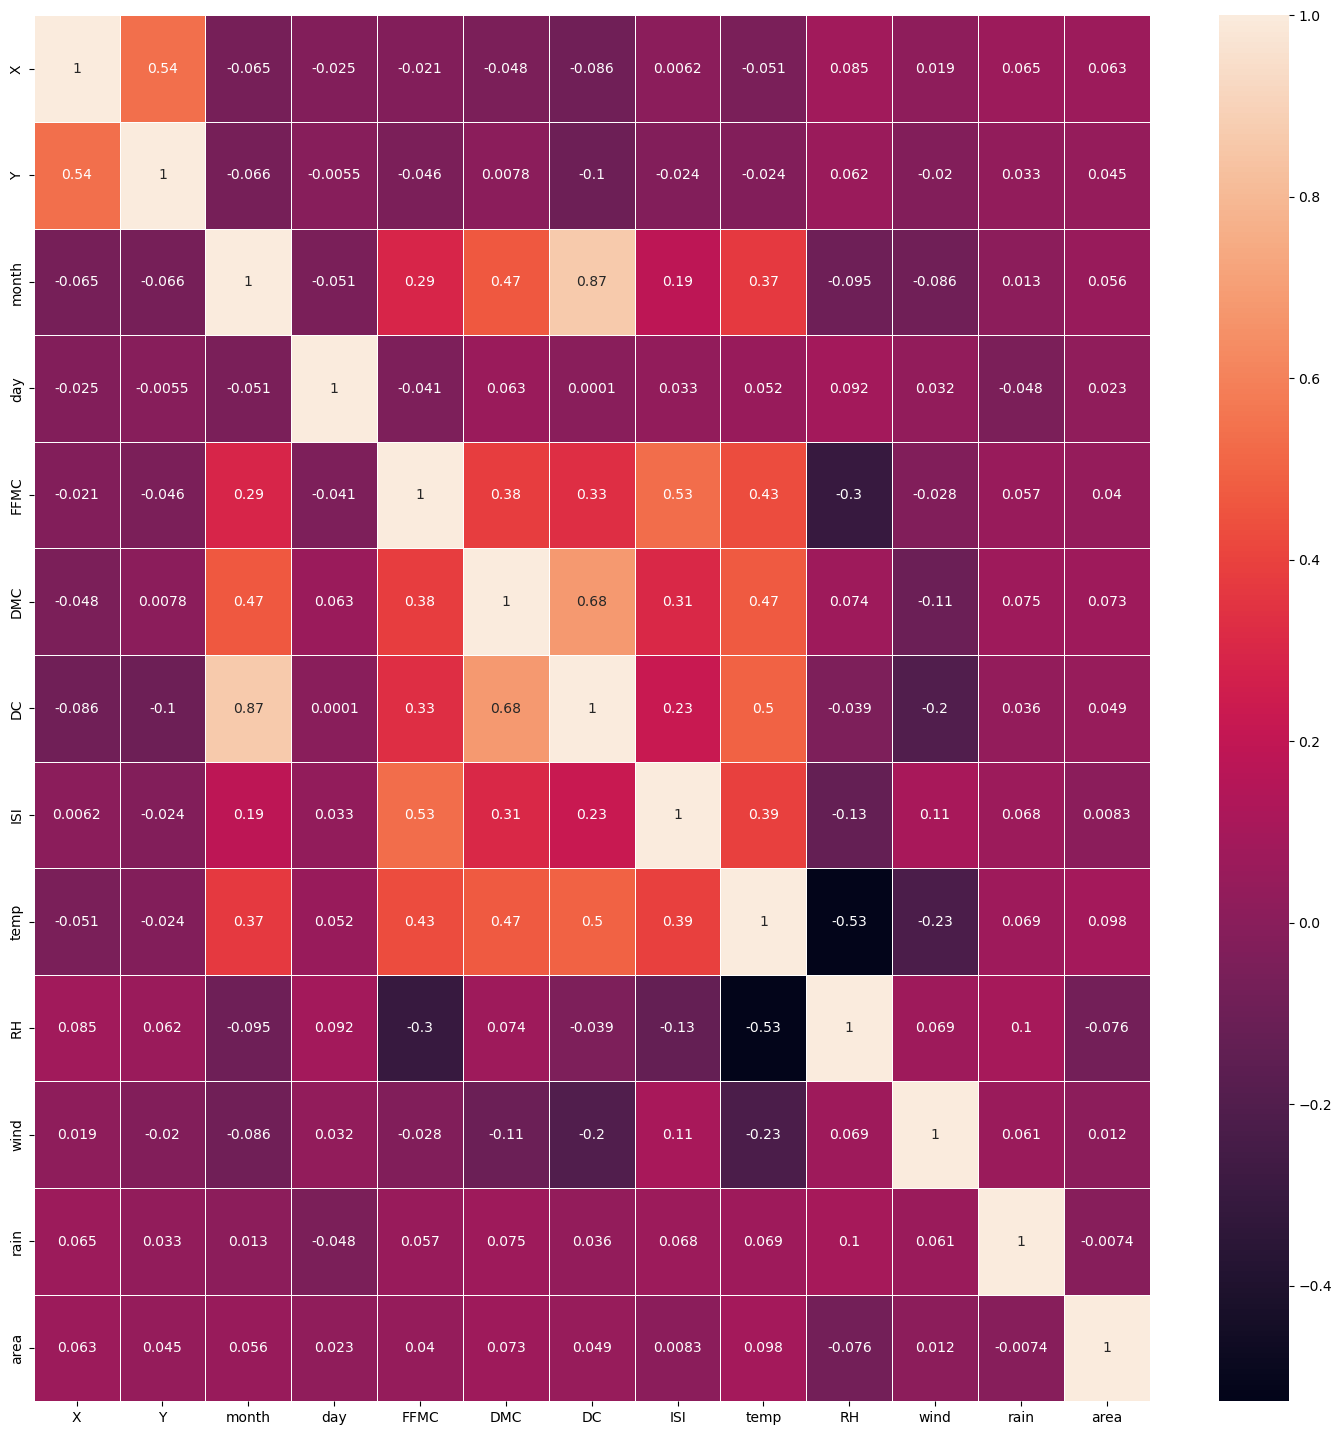

In [214]:
#Выведем тепловую карту корреляции
plt.subplots(figsize=(18, 18))
sns.heatmap(correlation,annot= True, linewidths=.5)

In [207]:
#Удаляем столбец DC дабы избежать мультиколлинеарность
df.drop(["DC"],axis = 1, inplace = True)

#Разбиваем выборку на тестовую и обучающую
Y = df['area']
X = df.drop('area', axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.99, shuffle=True, random_state=1)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [208]:
#Регрессия - линейная
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, Y_train)

prediction = lin_reg_model.predict(X_test)
mae = mean_absolute_percentage_error(prediction, Y_test)
score = r2_score(Y_test, prediction)

print("----Linear Regression-----")
print("R^2: {:.5f}".format(score))
print('MAPE: %s'%(mae))

Linear Regression R^2: 0.03347
MAPE: 1.6089961875318515


In [209]:
#Регрессия - лассо
lasso = Lasso()
lasso.fit(X_train,Y_train)

prediction_lasso = lasso.predict(X_test)
score = r2_score(Y_test, prediction_lasso)
mae = mean_absolute_percentage_error(prediction_lasso, Y_test)

print("-----Lasso Regression-----")
print("R^2: {:.5f}".format(score))
print('MAPE: %s'%(mae))

Linear Regression R^2: 0.05992
MAPE: 1.4807538151899557


In [210]:
#Регрессия - ближайших соседей
knreg = KNeighborsRegressor()
knreg.fit(X_train,Y_train)

prediction_knreg = knreg.predict(X_test)
score_ = r2_score(Y_test, prediction_knreg)
mae_ = mean_absolute_percentage_error(prediction_knreg, Y_test)

print("----K-Neighbors Regressor----")
print("R^2: {:.5f}".format(score_))
print('MAPE: %s'%(mae_))

Linear Regression R^2: -0.47488
MAPE: 21.96256892332624


In [211]:
#Регрессия - случайный лес
rfreg = RandomForestRegressor()
rfreg.fit(X_train,Y_train)

prediction_rfreg = rfreg.predict(X_test)
score = r2_score(Y_test, prediction_rfreg)
mae = mean_absolute_percentage_error(prediction_rfreg, Y_test)

print("----Random Forest Regressor---")
print("R^2: {:.5f}".format(score))
print('MAPE: %s'%(mae))

Linear Regression R^2: -0.44713
MAPE: 3.6919995789508557


In [212]:
#Регрессия - опорный вектор
svr = SVR()
svr.fit(X_train,Y_train)

prediction_svr = svr.predict(X_test)
score = r2_score(Y_test, prediction_svr)
mae = mean_absolute_percentage_error(prediction_svr, Y_test)

print("---Support Vector Regressor---")
print("R^2: {:.5f}".format(score))
print('MAPE: %s'%(mae))

Linear Regression R^2: -0.40630
MAPE: 11.038983789065886
